In [1]:
# 사후분포의 밀도함수를 그리고, 위의 값들을 사후분포 밀도함수 위에 그리시오.

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

![조건](./img/question.png)

In [2]:
alpha <- 1
beta <- 1
n <- 10
x <- 3

In [3]:
theta <- seq(from = 0, to = 1, length = 100)
prior.den <- dbeta(theta, alpha, beta)
post.den <- dbeta(theta, alpha + x, beta + n | -x)
likelihood <- dbinom(x, size = n, prob = theta)
likelihood <- 100 * likelihood / sum(likelihood)

In [4]:
post.summary <- numeric(6)
names(post.summary) <- c("post mean", "post median", "MAP", "post sd", "2.5%", "97.5%")
post.summary['post mean'] <- (alpha + x) / (alpha + beta + n)
post.summary['post median'] <- qbeta(0.5, alpha + x, beta + n - x)
post.summary['MAP'] <- (alpha + x - 1) / (alpha + beta + n - 2)
post.summary['post sd'] <- sqrt((alpha + x) * (beta + n - x) / ((alpha + beta + n)^2 * (alpha + beta + n + 1)))
post.summary['2.5%'] <- qbeta(0.025, alpha + x, beta + n - x)
post.summary['97.5%'] <- qbeta(0.975, alpha + x, beta + n - x)

In [5]:
post.summary

post mean post median         MAP     post sd        2.5%       97.5% 
  0.3333333   0.3238045   0.3000000   0.1307441   0.1092634   0.6097426

In [6]:
xpts1 <- seq(f = post.summary['2.5%'], t = post.summary['97.5%'], len = 100)
t(xpts1)
length(xpts1)

0.1092634,0.1143188,0.1193741,0.1244295,0.1294848,0.1345402,0.1395955,0.1446509,0.1497062,0.1547615,...,0.5642445,0.5692998,0.5743551,0.5794105,0.5844658,0.5895212,0.5945765,0.5996319,0.6046872,0.6097426


[1] 100

In [7]:
xpts <- c(xpts1, xpts1[100:1])
t(xpts)
length(xpts)

0.1092634,0.1143188,0.1193741,0.1244295,0.1294848,0.1345402,0.1395955,0.1446509,0.1497062,0.1547615,...,0.1547615,0.1497062,0.1446509,0.1395955,0.1345402,0.1294848,0.1244295,0.1193741,0.1143188,0.1092634


[1] 200

In [8]:
t(100:1)

100,99,98,97,96,95,94,93,92,91,...,10,9,8,7,6,5,4,3,2,1


In [9]:
ypts1 <- dbeta(xpts1, alpha + x, beta + n - x)
t(ypts1)
length(ypts1)

0.766026,0.84308,0.9222416,1.003187,1.085588,1.169118,1.25345,1.338261,1.423234,1.508057,...,0.7074183,0.6696109,0.6330634,0.5977809,0.5637655,0.5310158,0.4995275,0.4692935,0.4403037,0.4125455


[1] 100

In [10]:
ypts <- c(ypts1, xpts1[100:1])
t(ypts)
length(ypts)

0.766026,0.84308,0.9222416,1.003187,1.085588,1.169118,1.25345,1.338261,1.423234,1.508057,...,0.1547615,0.1497062,0.1446509,0.1395955,0.1345402,0.1294848,0.1244295,0.1193741,0.1143188,0.1092634


[1] 200

In [11]:
ymax <- max(prior.den, likelihood, post.den)
ymax

[1] 4

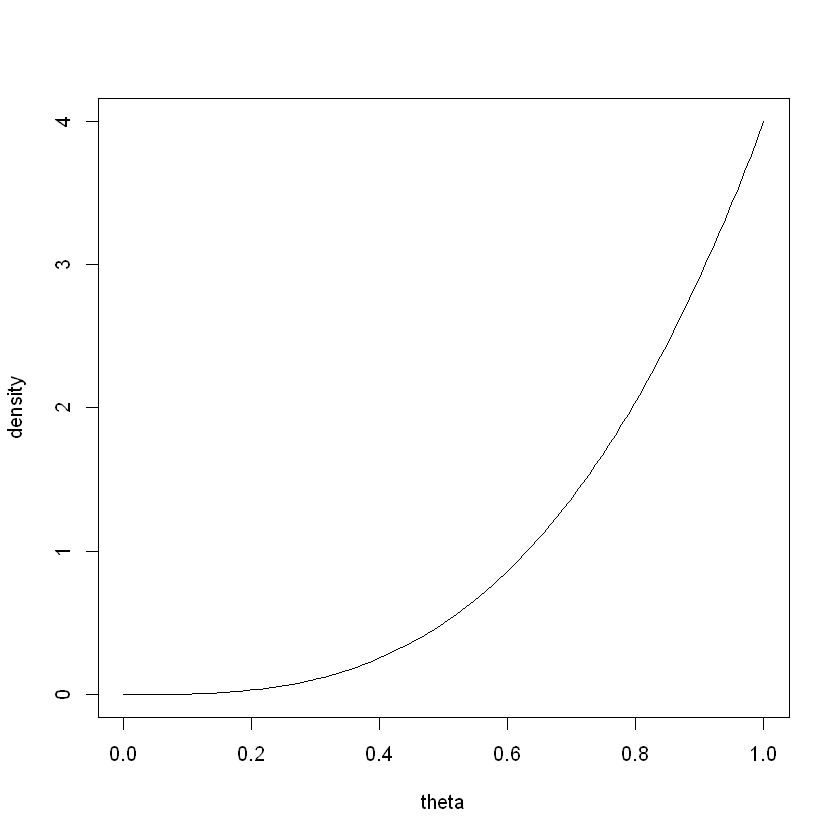

In [12]:
plot(theta, post.den, type = 'l', ylab = 'density', ylim = c(0, ymax))

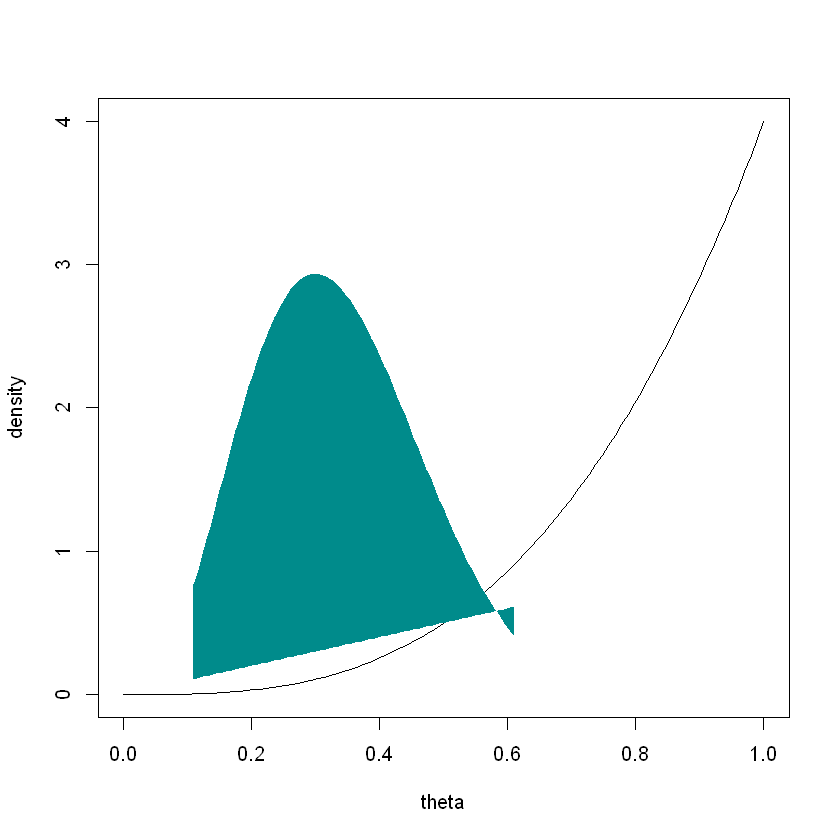

In [13]:
plot(theta, post.den, type = 'l', ylab = 'density', ylim = c(0, ymax))
polygon(x = xpts, y = ypts, col = 'cyan4', border = NA, fillOddEven = TRUE)

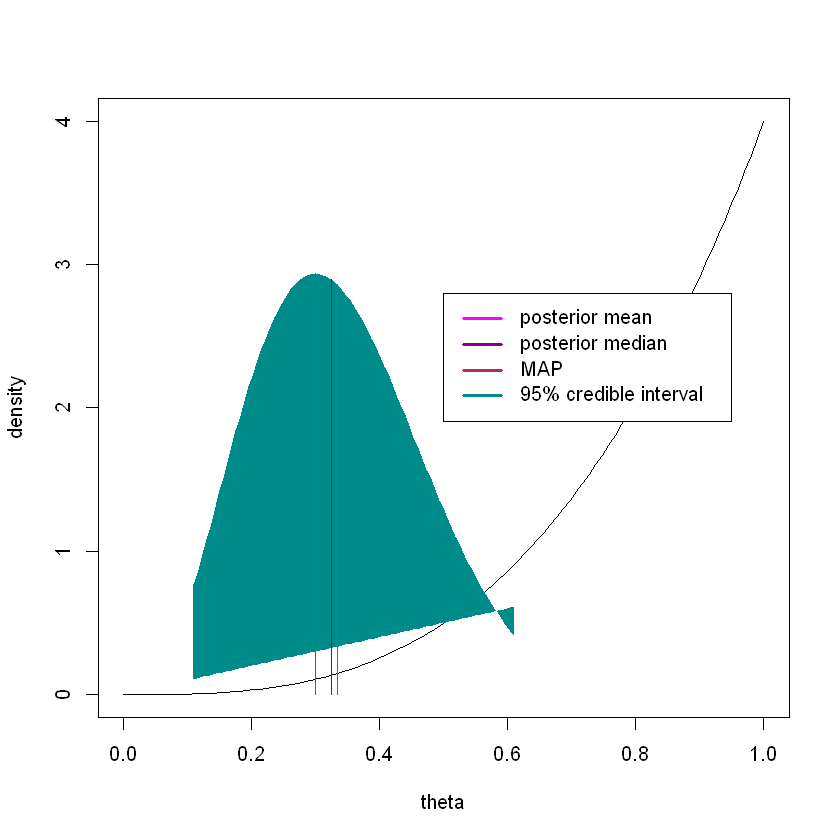

In [14]:
plot(theta, post.den, type = 'l', ylab = 'density', ylim = c(0, ymax))
polygon(x = xpts, y = ypts, col = 'cyan4', border = NA, fillOddEven = TRUE)
lines(x = rep(post.summary['post mean'], 2), y = c(0, dbeta(post.summary['post mean'], alpha + x, beta + n - x)), col = 'magenta')
lines(x = rep(post.summary['post median'], 2), y = c(0, dbeta(post.summary['post median'], alpha + x, beta + n - x)), col = 'magenta4')
lines(x = rep(post.summary['MAP'], 2), y = c(0, dbeta(post.summary['MAP'], alpha + x, beta + n - x)), col = 'maroon')
legend(0.5, 2.8, c('posterior mean', 'posterior median', 'MAP', '95% credible interval'), lty = c(1, 1, 1, 1), lwd = c(2.5, 2.5, 2.5, 2.5), col = c('magenta','magenta4','maroon','cyan4'))